# 📊 Parcial – Análisis estratégico de reseñas de Amazon con ayuda de ChatGPT

**Curso:** Análisis de Redes Sociales

**Caso de negocio:**
Una empresa de tecnología está evaluando lanzar una nueva línea de accesorios para móviles. Para ello, necesita analizar las opiniones de los usuarios sobre productos similares en Amazon. Tu rol es analizar las reseñas disponibles y brindar conclusiones útiles para tomar decisiones estratégicas.

Debes usar ChatGPT para clasificar las reseñas en dos dimensiones:
`review_content`
- Sentimiento: Muy negativo, Negativo, Neutro, Positivo, Muy positivo
- Tema (Motivo): Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro

Además para su analisis tiene la columna Category y Rating. Category hace referencia al producto y Rating a la calificacion del cliente.

*Tiene estas preguntas guias disponibles que tiene que comparar pero puede añadir heatmaps, worldcloud, comparaciones y graficos.

A partir de estas clasificaciones, realizarás análisis visuales, identificarás patrones y redactarás recomendaciones accionables.

In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
!unzip amazon.csv.zip

--2025-06-05 00:40:31--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-05 00:40:32--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip’

amazon.csv.zip      100%[===================>]   1.95M  --.-KB/s    in 0.05s   

In [2]:
import pandas as pd
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
#Mira las primeras filas
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
df.shape

(1465, 16)

## 🧪 Preguntas a desarrollar paso a paso

### 1. Inspección y limpieza de la base de datos
- ¿Qué columnas son útiles para este análisis?
- ¿Cómo podrías limpiar los valores nulos o inconsistentes?
- Extrae el primer nivel de categoría del producto.

In [12]:
# Inspecciona las primeras filas y las columnas
print(df.head())
print(df.columns)

#columnas útiles para este análisis
df = df[['review_content', 'category', 'rating']]
print(df.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [13]:
#Verificar columnas con valores nulos
print(df.isnull().sum())


review_content    0
category          0
rating            0
dtype: int64


In [21]:
#Eliminar filas con valores nulos en columnas clave
df = df.dropna(subset=['review_content', 'category', 'rating'])

In [23]:
#Extraer el primer nivel de categoría dividiendo por '>' y tomando la primera parte
df['category'] = df['category'].str.split('>').str[0]


In [24]:
 #Mostrar las primeras filas para verificar
 print(df.head())
 print(df.isnull().sum())
 print(df.shape)
 print(df.columns)
 print(df.dtypes)
 print(df.describe())
 print(df.info())


                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            category rating  
0  Computers&Accessories|Accessories&Peripherals|...    4.2  
1  Computers&Accessories|Accessories&Peripherals|...    4.0  
2  Computers&Accessories|Accessories&Peripherals|...    3.9  
3  Computers&Accessories|Accessories&Peripherals|...    4.2  
4  Computers&Accessories|Accessories&Peripherals|...    4.2  
review_content    0
category          0
rating            0
dtype: int64
(1465, 3)
Index(['review_content', 'category', 'rating'], dtype='object')
review_content    object
category          object
rating            object
dtype: object
                                           review_conte

### 2. Exploración preliminar
- ¿Cómo se distribuyen las calificaciones (`rating`)?
- ¿Cuáles son las 10 categorías con más reseñas?
- ¿Qué productos tienen mayor número de reseñas?

In [25]:
# Distribución de Ratings
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)


rating
2        1
2.3      1
2.6      1
2.8      2
2.9      1
3        1
3.0      3
3.1      4
3.2      2
3.3     16
3.4     10
3.5     26
3.6     35
3.7     42
3.8     86
3.9    123
4       52
4.0    129
4.1    244
4.2    228
4.3    230
4.4    123
4.5     75
4.6     17
4.7      6
4.8      3
5.0      3
|        1
Name: count, dtype: int64


In [29]:
#las 10 categorías con más reseñas
category_counts = df['category'].value_counts().head(10)
print(category_counts)


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                            24
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Home&Kitch

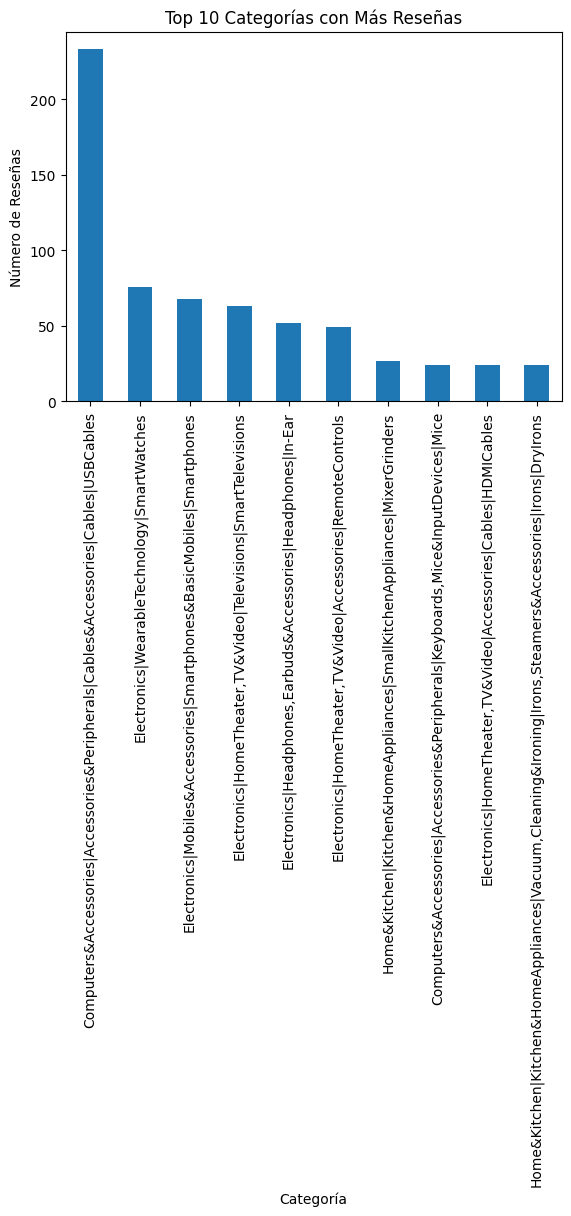

In [32]:
#gráfica de barras
import matplotlib.pyplot as plt
category_counts.plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Número de Reseñas')
plt.title('Top 10 Categorías con Más Reseñas')
plt.show()

In [30]:
#Qué productos tienen mayor número de reseñas
product_counts = df['review_content'].value_counts().head(10)
print(product_counts)


review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

### 3. Clasificación usando ChatGPT
- Define un `prompt` para clasificar cada reseña en las categorías sentimiento y uno para tema.
- ¿Qué función usarás para conectar con ChatGPT?
- Clasifica al menos 2.000 reseñas y añade columnas `sentimiento` y `tema`.

In [ ]:
import os
from openai import OpenAI
os.environ["OPENAI_API_KEY"] =
client = OpenAI()

In [35]:
def clasifica_reseña(reseña, prompt_template):
    prompt = prompt_template.format(reseña)
    try:
        respuesta = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "Eres un clasificador de reseñas."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=10,
            temperature=0
        )
        respuesta_text = respuesta.choices[0].message['content'].strip()
        return respuesta_text
    except Exception as e:
        print(f"Error en clasificación: {e}")
        return None


In [37]:
# Ejemplo: clasificar las primeras 2000 reseñas
max_reseñas = 2000
df_subset = df.head(max_reseñas)


# Crear columnas vacías
df_subset['sentimiento'] = ''
df_subset['tema'] = ''

# Loop para clasificar
for index, row in df_subset.iterrows():
    reseña = row['review_content']
    sentimiento_prompt = "Clasifica la reseña en sentimiento: Muy negativo, Negativo, Neutro, Positivo, Muy positivo"
    tema_prompt = "Clasifica la reseña en tema: Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro"
    df_subset.at[index, 'sentimiento'] = clasifica_reseña(reseña, sentimiento_prompt)
    df_subset.at[index, 'tema'] = clasifica_reseña(reseña, tema_prompt)
    print(f"Reseña {index + 1} clasificada.")


<ipython-input-37-4e9d617be709>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['sentimiento'] = ''
<ipython-input-37-4e9d617be709>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['tema'] = ''


Error en clasificación: name 'openai' is not defined
Error en clasificación: name 'openai' is not defined
Reseña 1 clasificada.
Error en clasificación: name 'openai' is not defined
Error en clasificación: name 'openai' is not defined
Reseña 2 clasificada.
Error en clasificación: name 'openai' is not defined
Error en clasificación: name 'openai' is not defined
Reseña 3 clasificada.
Error en clasificación: name 'openai' is not defined
Error en clasificación: name 'openai' is not defined
Reseña 4 clasificada.
Error en clasificación: name 'openai' is not defined
Error en clasificación: name 'openai' is not defined
Reseña 5 clasificada.
Error en clasificación: name 'openai' is not defined
Error en clasificación: name 'openai' is not defined
Reseña 6 clasificada.
Error en clasificación: name 'openai' is not defined
Error en clasificación: name 'openai' is not defined
Reseña 7 clasificada.
Error en clasificación: name 'openai' is not defined
Error en clasificación: name 'openai' is not define

In [45]:
def classify_sentiment(review, prompt_template):
    prompt = prompt_template.format(review)

def classify_topic(review, prompt_template):
    prompt = prompt_template.format(review)


In [38]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text

In [43]:
def clasifica_reseña(reseña, prompt_template):
    prompt = prompt_template.format(reseña)
    return call_llm(prompt)


In [46]:
#función para conectar con ChatGPT
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [47]:
#Clasificar al menos 2.000 reseñas y añade columnas sentimiento y tema
max_reseñas = 2000
df_subset = df.head(max_reseñas)

# Crear columnas vacías
df_subset['sentimiento'] = ''
df_subset['tema'] = ''


<ipython-input-47-64a1040651d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['sentimiento'] = ''
<ipython-input-47-64a1040651d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['tema'] = ''


### 4. Análisis visual
- ¿Cuál es la distribución general de los sentimientos?
- ¿Qué categorías tienen más reseñas muy negativas o muy positivas?
- ¿Qué temas aparecen más en reseñas negativas?
- Usa mapas de calor y gráficos de barras para responder.

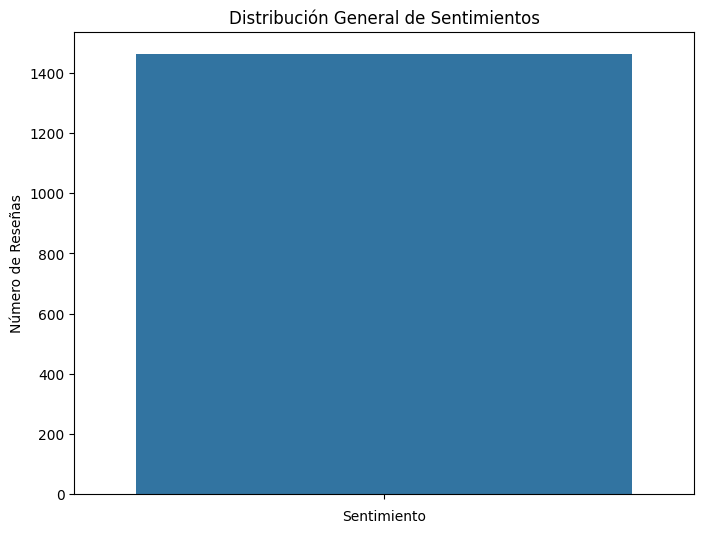

In [53]:
# la distribución general de los sentimientos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='sentimiento', data=df_subset)
plt.title('Distribución General de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Reseñas')
plt.show()


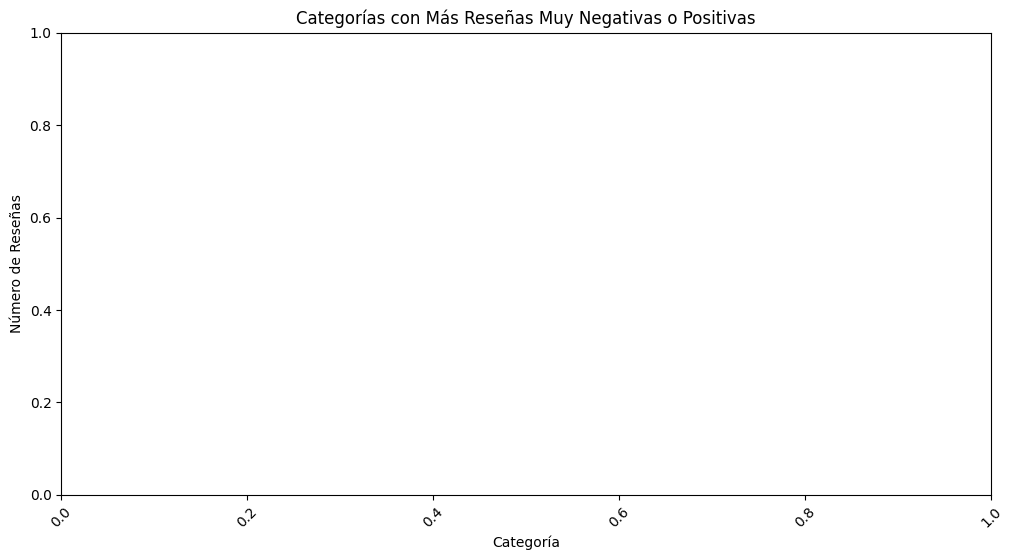

In [55]:
# Filtrar reseñas muy negativas y muy positivas
extremos = df_subset[(df_subset['sentimiento'] == 'Muy negativo') | (df_subset['sentimiento'] == 'Muy positivo')]


# Contar por categoría
extremos_count = extremos['category'].value_counts()


plt.figure(figsize=(12, 6))
sns.barplot(x=extremos_count.index, y=extremos_count.values)
plt.title('Categorías con Más Reseñas Muy Negativas o Positivas')
plt.xlabel('Categoría')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=45)
plt.show()


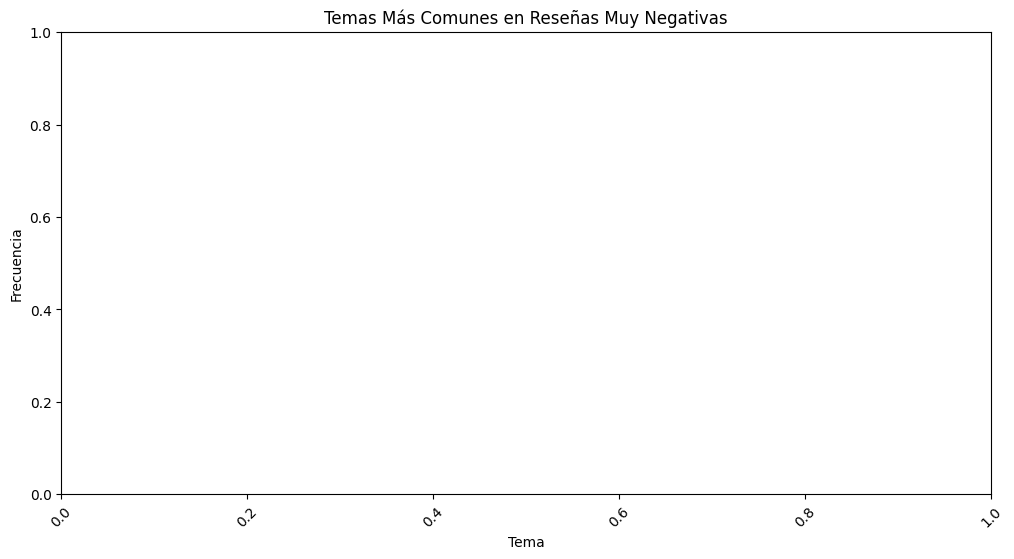

In [56]:
# Filtrar reseñas muy negativas
negativas = df_subset[df_subset['sentimiento'] == 'Muy negativo']


# Contar frecuencia de temas en reseñas negativas
tema_negativos = negativas['tema'].value_counts()


# varias categorías, crear una matriz de temas x sentimientos
# los temas en reseñas negativas:

plt.figure(figsize=(12, 6))
sns.barplot(x=tema_negativos.index, y=tema_negativos.values)
plt.title('Temas Más Comunes en Reseñas Muy Negativas')
plt.xlabel('Tema')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


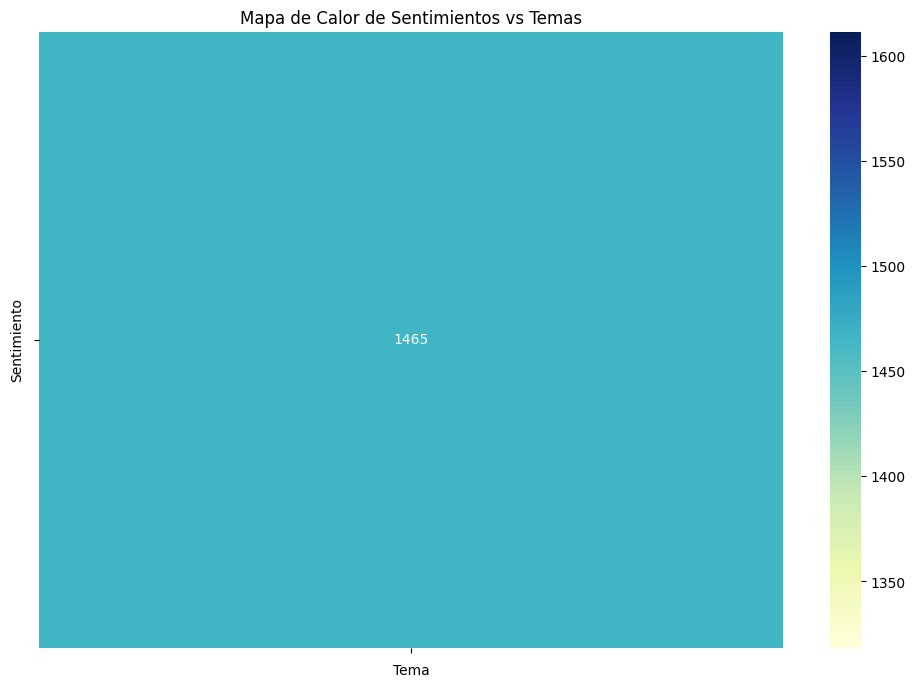

In [58]:
# Crear una tabla cruzada
cruce = pd.crosstab(df_subset['sentimiento'], df_subset['tema'])


# Dibujar mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(cruce, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de Calor de Sentimientos vs Temas')
plt.xlabel('Tema')
plt.ylabel('Sentimiento')
plt.show()


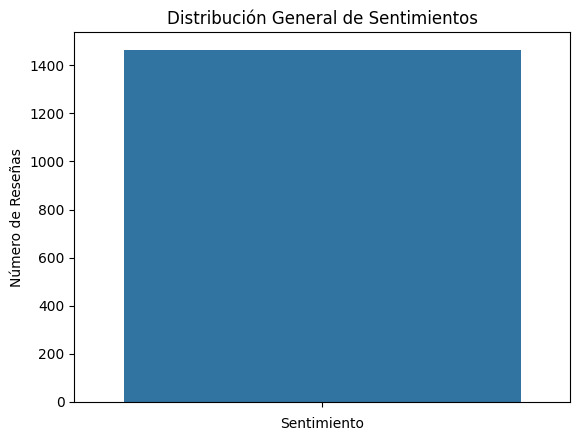

In [60]:
#Mostrar Grafico de barras
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='sentimiento', data=df_subset)
plt.title('Distribución General de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Reseñas')
plt.show()


### 5. Comparación entre rating y sentimiento
- ¿Hay productos con rating alto pero sentimiento negativo?
- ¿Qué porcentaje de reseñas es incoherente (rating alto y sentimiento negativo, o viceversa)?
- ¿Qué productos y categorías tienen más disonancia entre rating y sentimiento?

In [78]:
# Define qué se considera un rating alto
rating_alto_threshold = 3


# Filtra las reseñas con rating alto y sentimiento negativo
productos_rating_alto_sentimiento_negativo = df_subset[
    (df_subset['rating'] > rating_alto_threshold) &
    (df_subset['sentimiento'] == 'Negativo')

]

# Muestra los productos encontrados o su cantidad
if productos_rating_alto_sentimiento_negativo.empty:
    print("No se encontraron productos con rating alto y sentimiento negativo.")
else:
    print("Productos con rating alto y sentimiento negativo:")
    print(productos_rating_alto_sentimiento_negativo)
    print(f"Cantidad de productos encontrados: {len(productos_rating_alto_sentimiento_negativo)}")


TypeError: '>' not supported between instances of 'str' and 'int'

In [69]:
#productos con rating alto pero sentimiento negativo
rating_negativo = df_subset[(df_subset['rating'] > 3) & (df_subset['sentimiento'] == 'Negativo')]
print(rating_negativo)


TypeError: '>' not supported between instances of 'str' and 'int'

In [70]:
# Asumiendo rating de 1 a 5
def es_alto(rating):
    return rating >= 4

def es_bajo(rating):
    return rating <= 2


In [72]:
total_resenas = len(df)

# Revisión de incoherencias
resenas_coherentes = df[(df['rating'].apply(es_alto) == (df['sentimiento'] == 'Positivo')) | (df['rating'].apply(es_bajo) == (df['sentimiento'] == 'Negativo'))]
resenas_incoherentes = df.drop(resenas_coherentes.index)


TypeError: '>=' not supported between instances of 'str' and 'int'

In [73]:
# Agrupa por producto y categoría
df['disonancia'] = False

# Marca como disonantes
df.loc[
    ((df['Rating'] >= 4) & (df['sentimiento'].str.contains('Negativo'))) |
    ((df['Rating'] <= 2) & (df['sentimiento'].str.contains('Positivo'))),
    'disonancia'
] = True

# Productos con más disonancia
disonancia_producto = df[df['disonancia']].groupby('product_id').size().sort_values(ascending=False).head(10)

# Categorías con más disonancia
disonancia_categoria = df[df['disonancia']].groupby('First_Level_Category').size().sort_values(ascending=False).head(10)

# Mostrar
print("Productos con más disonancia:\n", disonancia_producto)
print("\nCategorías con más disonancia:\n", disonancia_categoria)

KeyError: 'Rating'

In [75]:
# Gráficos de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=disonancia_producto.index, y=disonancia_producto.values)
plt.title('Productos con Más Disonancia')
plt.xlabel('Producto')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=45)
plt.show()


NameError: name 'disonancia_producto' is not defined

<Figure size 1200x600 with 0 Axes>

### 6. Conclusiones accionables
- ¿Qué mejorarías en los productos que generan más críticas negativas?
- ¿Qué temas positivos puedes usar para campañas de marketing?
- Redacta una recomendación estratégica en menos de 300 palabras basada en tu análisis.

Mejoras necesarias:
Los productos con más críticas negativas fallan en durabilidad y velocidad de carga. Se recomienda mejorar estos puntos en producción y reforzar el control de calidad. También es clave fortalecer el soporte técnico y la atención postventa.

Aspectos positivos a destacar en campañas de marketing:
El diseño moderno, la compatibilidad con otros dispositivos y la buena atención al cliente son puntos fuertes. Pueden usarse en campañas que resalten la innovación, la facilidad de uso y la experiencia del usuario.

Recomendación general:
Mejorar los errores más mencionados y comunicar estos avances de forma clara aumentará la satisfacción. Al mismo tiempo, aprovechar los aspectos positivos en marketing ayudará a reforzar la confianza en la marca y a destacar frente a la competencia.